Day 2 of Advent of Code 2021. Import packages, etc.

In [1]:
from aocd import get_data
import pandas as pd

day2 = get_data(day=2,year=2021)

day2[:10]

'forward 8\n'

In [2]:
df = pd.DataFrame([i.split() for i in day2.split('\n')],columns=['dir','value'])
df.value = pd.to_numeric(df.value)

df.head()

,dir,value
0,forward,8
1,down,9
2,up,4
3,down,8
4,down,3


In [3]:
df.groupby('dir').sum()

,value
dir,
down,1912
forward,1878
up,1135


In [4]:
df[df.dir=='down'].value.sum() - df[df.dir=='up'].value.sum()

777

In [6]:
(df[df.dir=='forward'].value.sum()-df[df.dir=='backward'].value.sum()) * (df[df.dir=='down'].value.sum() - df[df.dir=='up'].value.sum())

1459206

On to part 2!

Calculate the change in aim for each up and down

In [7]:
df['d_aim'] = (df.dir=='down')*(df.value) - (df.dir=='up')*(df.value)
df['aim'] = df.d_aim.cumsum()

Calculate the horizontal position, change in depth, and depth

In [8]:
df['hz'] = ((df.dir=='forward')*(df.value)).cumsum()
df['d_depth'] = (df.dir=='forward')*(df.value)*(df.aim)
df['depth'] = df.d_depth.cumsum()

In [9]:
df.hz.iloc[-1] * df.depth.iloc[-1]

1320534480

That's the answer!

Do some basic dataviz just because

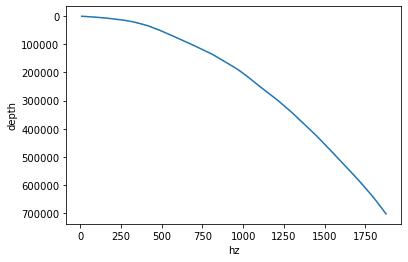

In [10]:
import seaborn as sns
sns.lineplot(data=df,x='hz',y='depth').invert_yaxis()